# Customer Churn Analysis

Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
#import some required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv(r'C:\Users\Shalini Maurya\Desktop\dataset\Customer Churn.csv')

In [3]:
ds.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# EDA

In [4]:
ds.shape

(7043, 21)

There ar 7043 rows and 21 columns

In [6]:
#lets see some information about dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Most of the coulumn are of object type, Churn cloumn will be our target coulmn
As we can see Total chrages column is a object type, we need to convert it into numeric. 

In [8]:
ds['TotalCharges']=pd.to_numeric(ds['TotalCharges'],errors='coerce')

In [10]:
#Now lets check any null value available in this coulmn
ds['TotalCharges'].isnull().sum()

11

In [11]:
#as there are 11 null value available .lets fill this null values
ds['TotalCharges']=ds['TotalCharges'].fillna(ds['TotalCharges'].mean())

In [12]:
#lets again check if any null value availble
ds.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is null value availble , now we can proceed

In [16]:
#lets drop the customer ID as there is no need of this column in data analysis
ds.drop(columns=['customerID'],axis=1, inplace=True)

In [17]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


now data seems fine, we can move ahead

# Univariate Analysis

No     5174
Yes    1869
Name: Churn, dtype: int64


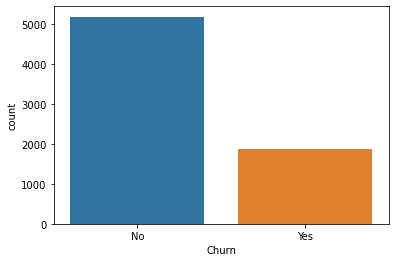

In [18]:
#lets check the target column count:-
sns.countplot(x='Churn',data=ds)
print(ds["Churn"].value_counts())

Among 7043 customers, 1869 have stopped taking the services, now we will see other columns

No     5174
Yes    1869
Name: Churn, dtype: int64


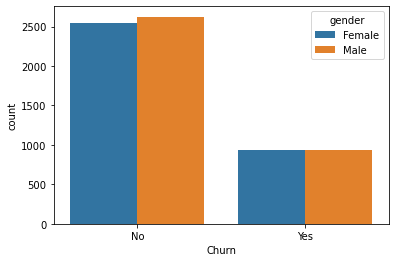

In [19]:
#lets check gender wise
sns.countplot(x='Churn',data=ds,hue='gender')
print(ds["Churn"].value_counts())

here we can see that gender has no role in the data analysis, as equal number of male and female have or havn't churned 

No     5174
Yes    1869
Name: Churn, dtype: int64


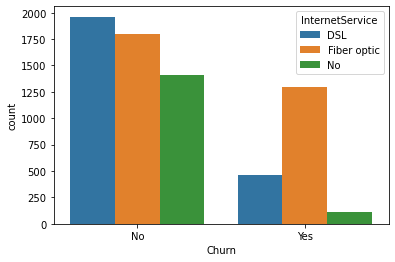

In [20]:
sns.countplot(x='Churn',data=ds,hue='InternetService')
print(ds["Churn"].value_counts())

This is showing that, customers using fiber optic have churned, company need to work on this.

No     5174
Yes    1869
Name: Churn, dtype: int64


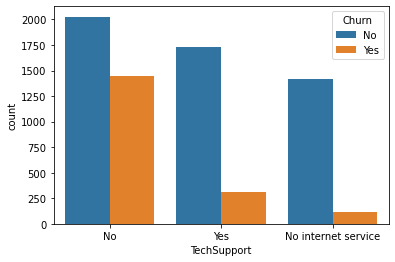

In [22]:
sns.countplot(hue='Churn',data=ds,x='TechSupport')
print(ds["Churn"].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


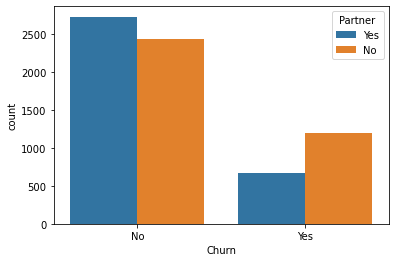

In [24]:
sns.countplot(hue='Partner',data=ds,x='Churn')
print(ds["Churn"].value_counts())

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

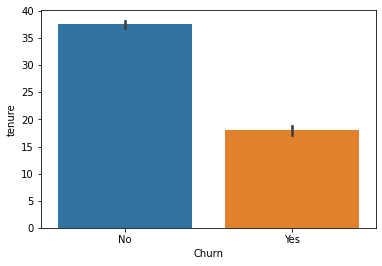

In [31]:
#now lets see the tenure
sns.barplot(x='Churn',y='tenure',data=ds)
#print(ds["Churn"].value_counts())

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

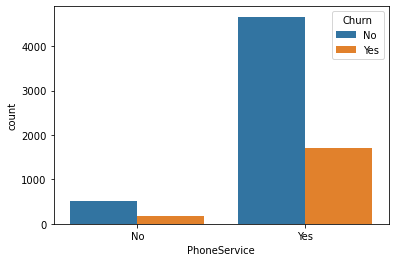

In [33]:
# Let's check how Phone Service effects the business
sns.countplot(x="PhoneService", data=ds, hue="Churn")

With good phone services, less chance to churn

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

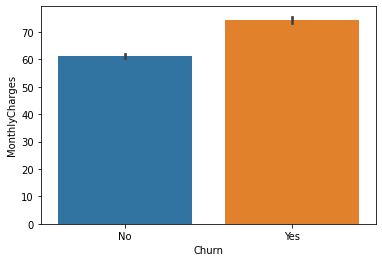

In [37]:
sns.barplot(y="MonthlyCharges", data=ds, x="Churn")

#somehow the high momthly charges, the high chance of customer can choose to churn

<AxesSubplot:xlabel='Contract', ylabel='count'>

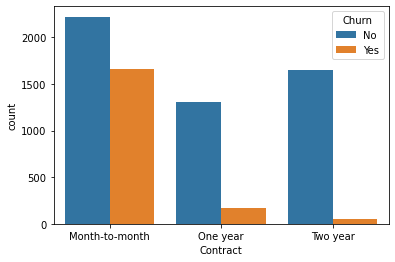

In [39]:
# Let's check how Contract effect on business

sns.countplot(x="Contract", data=ds, hue="Churn")

The customers who has month-to-month billing, they generally moved. So, need to focus on some long term contract

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

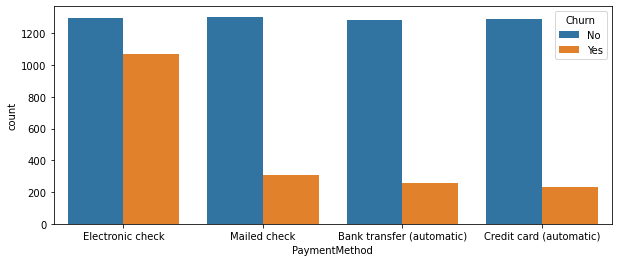

In [40]:
# Let's check how PaymentMethod effect on business

plt.figure(figsize=(10,4))
sns.countplot(x="PaymentMethod", data=ds, hue="Churn")

Most customers believe on credit card payment and automatic bank transfer payment. So, need to focus on this

# Checking Skewness

In [4]:
ds.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

In [5]:
#lets remove the skewness
for index in ds.skew().index:
    if ds.skew().loc[index]>0.5:
        ds[index] = np.log1p(ds[index])
    if ds.skew().loc[index]<-0.5:
        ds[index] = np.square(ds[index])

In [6]:
ds.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

All the required data are skewd now

In [7]:
#first we will conver the target column into classification
ds['Churn'].replace({'Yes':1, 'No':0},inplace=True)
ds['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [10]:
#now lets convert all the categorical columns to numerical
ds=pd.get_dummies(ds,drop_first=True)

In [11]:
ds.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0.0,1,29.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,34,56.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,2,53.85,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,45,42.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,2,70.70,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Now lets seperate the input and output columns
x=ds.drop(columns=['Churn'],axis=1)
y=ds['Churn']

Number of components explained 99% variance :  6906


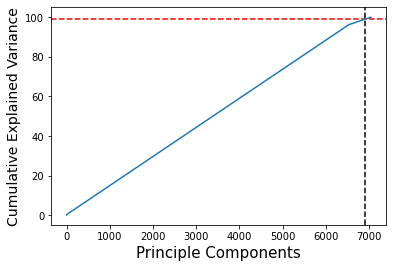

In [14]:
# Let's check the PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scale = StandardScaler()
df_x = scale.fit_transform(x)

x_pca = PCA()
x_pca.fit(df_x)

var_cumu = np.cumsum(x_pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>99)

print("Number of components explained 99% variance : ",k)
plt.xlabel("Principle Components", fontsize=15)
plt.ylabel("Cumulative Explained Variance", fontsize=14)
plt.axvline(x=k, color='k', linestyle='--')
plt.axhline(y=99, color='r', linestyle='--')
plt.plot(var_cumu)
plt.show()

only 20 columns are giving 99% variance. So, let's use the PCA for Model Building.

In [31]:
# Let's use the PCA for better result

pca = PCA(n_components=20)
X = pca.fit_transform(df_x)
X

array([[-0.80339966, -3.23244617,  5.20309773, ...,  0.11378638,
         0.69163112, -0.53486701],
       [-0.29311878, -0.76792493,  1.81086495, ...,  1.50527958,
         0.40206258, -0.40341085],
       [-0.44838286, -2.20978433,  1.3376288 , ..., -0.20938322,
         0.44525029, -2.65497107],
       ...,
       [-0.65584389, -2.23788375,  5.70400873, ..., -1.49837413,
         1.17159089, -1.22923749],
       [-0.93164472, -2.47702707, -1.65153514, ...,  0.50926546,
         0.01933567, -0.62106757],
       [-2.8835091 ,  2.37748432, -0.35571928, ..., -0.19854126,
        -1.76080251,  1.45022919]])

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, plot_roc_curve
from time import time

In [32]:
#now lets split the dataset into two part, training and testing
def bestmod(mod):
    max_score = 0
    max_state = 0
    start = time()
    for i in range(1,401):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.21, random_state = i)
        mod.fit(x_train, y_train)
        y_pre = mod.predict(x_test)
        score = accuracy_score(y_test, y_pre)
        if score > max_score:
            max_score = score
            max_state = i
    print("Best Random State is      : ",max_state)
    print("Best Accuracy Score is    : ",max_score)
    print("Cross Validation Score is : ",cross_val_score(mod, X, y, cv=5).mean())
    end = time()
    print("Time taken by model for prediction {:.4f} seconds".format(end-start))

In [33]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
bestmod(LR)

Best Random State is      :  18
Best Accuracy Score is    :  0.8128378378378378
Cross Validation Score is :  0.7897201029098652
Time taken by model for prediction 8.9873 seconds


In [46]:
from time import time
def bestmodel(model):
    start = time()
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.21, random_state = 59)
    model.fit(x_train, y_train)
    y_pre = model.predict(x_test)
    score = accuracy_score(y_test, y_pre)
    print("Best Accuracy Score is    : ",score)
    print("Cross Validation Score is : ",cross_val_score(model, X, y, cv=5).mean())
    end = time()
    print("Time taken by model for prediction {:.4f} seconds".format(end-start))

In [47]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
bestmodel(DTC)

Best Accuracy Score is    :  0.7243243243243244
Cross Validation Score is :  0.7161741281695593
Time taken by model for prediction 1.0745 seconds


In [48]:
# K-Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
bestmodel(KNC)

Best Accuracy Score is    :  0.7533783783783784
Cross Validation Score is :  0.75038782744048
Time taken by model for prediction 1.9828 seconds


In [49]:
# Support Vector Machine

from sklearn.svm import SVC
svc = SVC()
bestmodel(svc)

Best Accuracy Score is    :  0.797972972972973
Cross Validation Score is :  0.7867371483644106
Time taken by model for prediction 16.3949 seconds


In [50]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
bestmodel(RFC)

Best Accuracy Score is    :  0.7864864864864864
Cross Validation Score is :  0.782194516581715
Time taken by model for prediction 14.1732 seconds


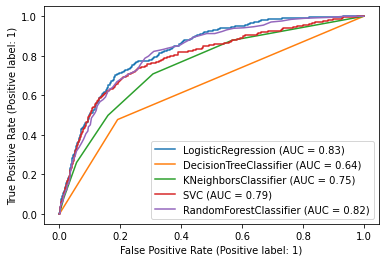

In [52]:
# Let's plot ROC AUC curve

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.21, random_state = 59)

disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(KNC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plt.legend(prop={"size":10}, loc="lower right")
plt.show()

After analyzing the accuracy score, cross validation score and ROC AUC curve. Now it is clear that Support Vector Classifier is giving the best score. So, let's try to increase the accuracy score using Hyperparameter Tuning.

# Hyperparameter Tuning

In [53]:
# Final Model with Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {"kernel" : ["sigmoid", "rbf"], "gamma" : ["scale", "auto"],
             "cache_size" : [200,300], "random_state": [55,56,57,58,59,60]}

grid_search = GridSearchCV(svc, param_grid)
grid_search.fit(x_train, y_train)
grid_search.best_params_

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.21, random_state = 56)
Final_Churn_Model = SVC(kernel="rbf", gamma="auto", cache_size=200, random_state = 56)
Final_Churn_Model.fit(x_train, y_train)
y_pred = Final_Churn_Model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7824324324324324

In [55]:
# Saving the Final Model

import joblib

joblib.dump(Final_Churn_Model, "Final_Churn_Model.pkl")

['Final_Churn_Model.pkl']